In [1]:
from CFNS.simulator import *

## 1. n-body circular motion

In [7]:
table = setup(0.01, 2)  # 실험 setup 인스턴스를 만듭니다.
table.add_particle(1, [1, 0],  [0, 0.5]) # particle 0을 추가합니다. 
table.add_particle(1, [-1, 0],  [0, -0.5]) # particle 1을 추가합니다. 
sim = simulator(table) # 위의 셋업을 기반으로 시뮬레이터 인스턴스를 만듭니다. 
sim.set_force("-G*m1*m2/(x**2)", {"G": 1}) # 힘을 중력을 선언하되, G = 1로 둡니다.
sim.exec(500) # 500회의 iteration을 돌리라고 명령합니다. 

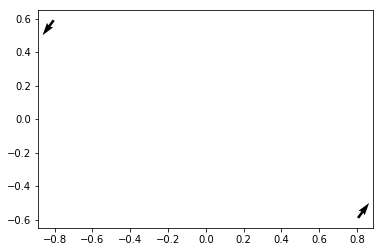

particle number: 0
Mass :  1 kg
Initial location : X coordinate = 1 , Y coordinate = 0 
Initial Velocity :  [-0.29788169 -0.40249912] m/s
particle number: 1
Mass :  1 kg
Initial location : X coordinate = -1 , Y coordinate = 0 
Initial Velocity :  [0.29788169 0.40249912] m/s


In [8]:
sim.setup.print_particles() # 입자들을 그래프로 출력하기
sim.setup.print_list() # 입자들의 목록을 list로 확인하기

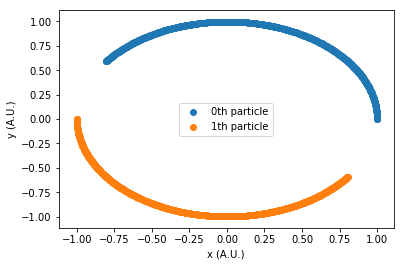

In [9]:
sim.trajectory()

In [10]:
# 3d case
table = setup(0.01, 3)
table.add_particle(1, [1, 0, 0],  [0, 0.5, 0.5])
table.add_particle(1, [-1, 0, 0],  [0, -0.5, 0.5])
# table.add_particle(1, [-1, 1, 0],# table.add_particle(1, [-1, 1, 0], [0, 0, 0])
 [0, 0, 0])
sim = simulator(table)
sim.set_force("-G*m1*m2/(x**2)", {"G": 1})
sim.exec(500)

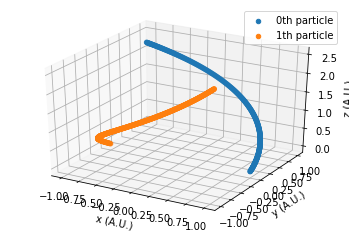

In [5]:
sim.trajectory()

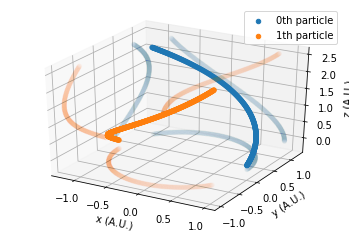

In [7]:
sim.trajectory(projection=True)

In [8]:
table = setup(0.01, 2)
v = 1/np.sqrt(2 * np.sqrt(3))
print(v)
table.add_particle(1, [0, 2],  [v, 0])
table.add_particle(1, [-1 * np.sqrt(3), -1],  [-1 * v * np.sin(np.pi/6), v * np.cos(np.pi/6)])
table.add_particle(1, [np.sqrt(3), -1], [-1 * v * np.sin(np.pi/6), -1 * v * np.cos(np.pi/6)])
sim = simulator(table)
sim.exec(600)

0.537284965911771


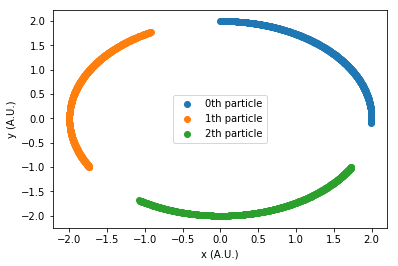

In [9]:
sim.trajectory()

In [10]:
# system setup
m1 = 1
m2 = 10
m3 = 3
a = 2 * np.sqrt(3)
w = np.sqrt((m1 + m2 + m3)/a**3)
x1 = np.array([0, 2])
x2 = np.array([-1 * np.sqrt(3), -1])
x3 = np.array([np.sqrt(3), -1])
xcm = (m1 * x1 + m2 * x2 + m3 * x3)/(m1 + m2 + m3)
r1 = np.sqrt(((x1-xcm)**2).sum())
r2 = np.sqrt(((x2-xcm)**2).sum())
r3 = np.sqrt(((x3-xcm)**2).sum())
rot = np.array([[0, 1], [-1, 0]])
table = setup(0.1, 2)
table.add_particle(m1, x1, w * np.matmul(rot, x1-xcm))
table.add_particle(m2, x2, w * np.matmul(rot, x2-xcm))
table.add_particle(m3, x3, w * np.matmul(rot, x3-xcm))
sim = simulator(table)
sim.set_force("-G*m1*m2/(x**2)", {"G": 1})
sim.exec(100)

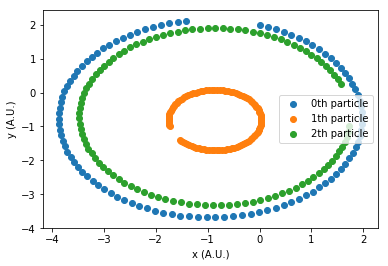

In [11]:
sim.trajectory()

In [12]:
table = setup(0.01, 2)
v = np.sqrt((4+np.sqrt(2))/8)
u = v / np.sqrt(2)
table.add_particle(1, [1, 1],  [-u, u])
table.add_particle(1, [-1, 1],  [-u, -u])
table.add_particle(1, [-1, -1], [u, -u])
table.add_particle(1, [1, -1], [u, u])
sim = simulator(table)
sim.exec(200)

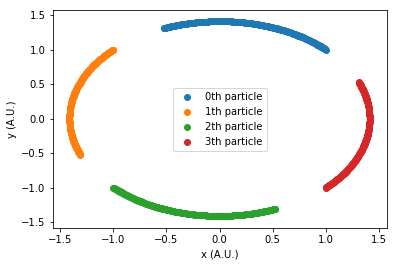

In [13]:
sim.trajectory()

## 2. Solarsyetem-like system

In [16]:

v = np.sqrt((4+np.sqrt(2))/8)
table = setup(0.01, 3)
table.add_particle(100000, [0, 0, 0],  [0, 0, 0])
table.add_particle(1, [-1, 0, 0],  [0, v, 0])
# table.add_particle(1, [-0.5, 0, 0],  [0, 0.1*v, 0])
# table.add_particle(1, [-1, 0, 0],  [0, v, 0])
sim = simulator(table)
sim.set_force("-C/(x**2)", {"C": 1})
sim.exec(1000)

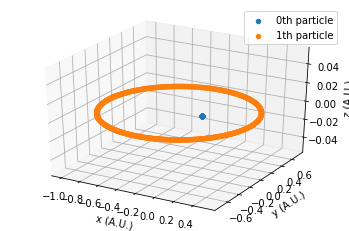

In [17]:
sim.trajectory()

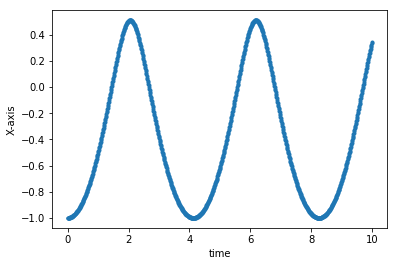

In [20]:
sim.setup.particles[1].location.plot_timeseries(0)

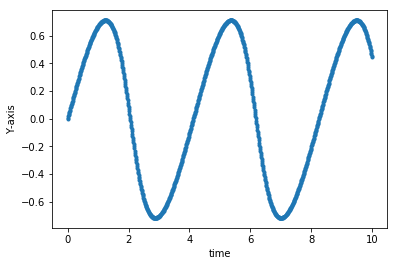

In [21]:
sim.setup.particles[1].location.plot_timeseries(1)

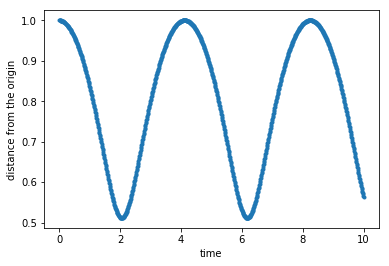

In [18]:
sim.setup.particles[1].location.plot_timeseries(3)

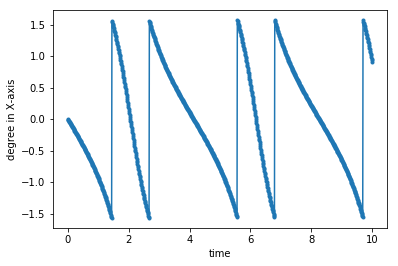

In [19]:
sim.setup.particles[1].location.plot_timeseries(4)

In [18]:
table = setup(0.01, 2)
table.add_particle(100000, [0, 0],  [0, 0])
table.add_particle(1, [-1, 0],  [0, 1.7*v])
sim = simulator(table)
sim.set_force("-C/(x**2)", {"C": 1})
sim.exec(1000)

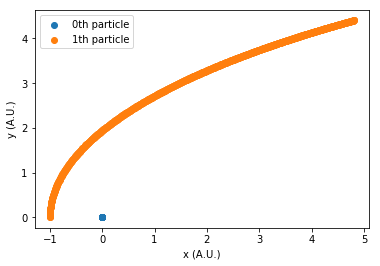

In [19]:
sim.trajectory()

In [20]:
table = setup(36000, 2)
table.add_particle(1, [0, 0],  [0, 0])
v = 2 * np.pi / (365 * 24 * 3600)
u = 2 * np.pi * 0.0026/ (28 * 24 * 3600)
table.add_particle(1/332946, [1, 0],  [0, v])
table.add_particle(1/2223510, [1.0026, 0],  [0, v - u])
sim = simulator(table)
sim.set_force("-G*m1*m2/(x**2)", {"G": 3.9645 * 10**(-14)}) # Gravitational constant with [AU, Solarmass, second] unit system
sim.exec(1000)

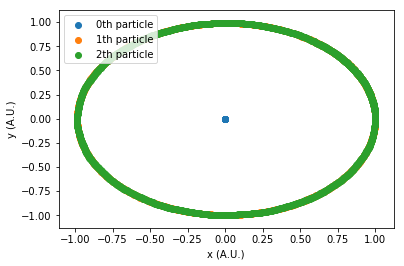

In [21]:
sim.trajectory()

In [22]:
table = setup(3600, 2)
table.add_particle(1, [0, 0],  [0, 0])
v = 2 * np.pi / (365 * 24 * 3600)
u = 2 * np.pi * 0.0026/ (28 * 24 * 3600)
table.add_particle(1/332946, [1, 0],  [0, v])
table.add_particle(1/2223510, [1.0026, 0],  [0, v + u])
sim = simulator(table)
sim.set_force("-G*m1*m2/(x**2)", {"G": 3.9645 * 10**(-14)})
sim.exec(24*27)

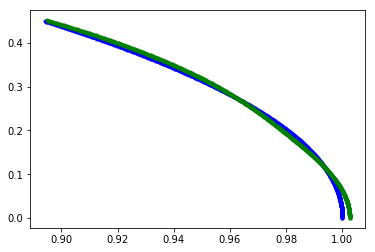

In [23]:
# 지구와 달만 보기 위해서 따로 plot
fig, ax = plt.subplots()
x1 = [d[0] for d in sim.setup.particles[0].location.data]
y1 = [d[1] for d in sim.setup.particles[0].location.data]
x2 = [d[0] for d in sim.setup.particles[1].location.data]
y2 = [d[1] for d in sim.setup.particles[1].location.data]
x3 = [d[0] for d in sim.setup.particles[2].location.data]
y3 = [d[1] for d in sim.setup.particles[2].location.data]

ax.plot( x2, y2, 'b.', x3, y3, 'g.')
# ax.plot( x2, y2, 'b.', x3, y3, 'g.')

## 3. Relativistic correction of Newton's Gravity (F~A/r^2 + B/r^4)

In [24]:
v = np.sqrt((4+np.sqrt(2))/8)
table = setup(0.05, 2)
table.add_particle(100000, [0, 0],  [0, 0])
table.add_particle(1, [1, 1],  [-1 * v * np.sin(np.pi/6), v * np.cos(np.pi/6)])
sim = simulator(table)
#아래과 같이 힘을 설정하고, paramter들을 넣을 수 있다. 
sim.set_force("-C/(x**2) - D/(x**4)", {"C": 1, "D": 0.1}) 
sim.exec(500)

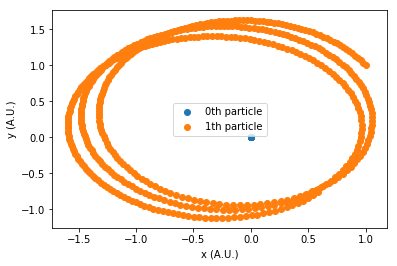

In [25]:
sim.trajectory()

## 4. Scattering Problem with Coulomb Potential

In [26]:
table = setup(0.001, 2)
table.add_particle(100000, [0, 0],  [0, 0])
table.add_particle(1, [-10, 10],  [1000, 0])
table.add_particle(1, [-10, 5],  [1000, 0])
table.add_particle(1, [-10, 1],  [1000, 0])
table.add_particle(1, [-10, 0.1],  [1000, 0,])
table.add_particle(1, [-10, 0.01],  [1000, 0])
sim = simulator(table)
sim.set_force("G*m1*m2/(x**2)", {"G": 1}) # Coulomb Potential
sim.exec(50)

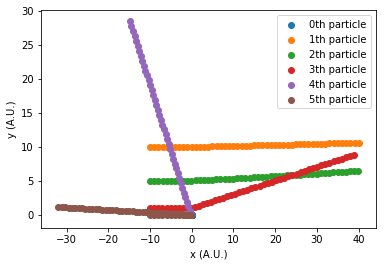

In [27]:
sim.trajectory()

## 5. Exponential decaying orbit

In [28]:
table = setup(0.01, 2)
v = 0.5
table.add_particle(100000, [0, 0],  [0, 0])
table.add_particle(1, [1, 0],  [v, v])
sim = simulator(table)
sim.set_force("-C/(x**3)", {"C": 1})
sim.exec(268)

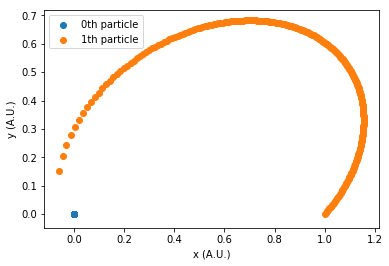

In [29]:
sim.trajectory()

## 6. rotating with spring (closed form Lissajous curve)

In [30]:
table = setup(0.01, 2)
v = 2
table.add_particle(100000, [0, 0],  [0, 0])
table.add_particle(1, [1, -1],  [2*v, v])
sim = simulator(table)
sim.set_force("-k*x", {"k": 10})
sim.exec(1200)

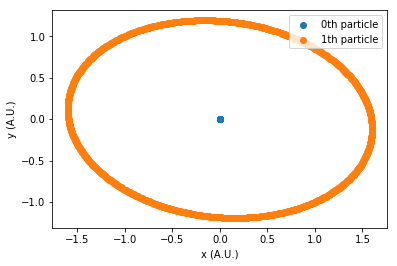

In [31]:
sim.trajectory()

## 7. free oscillotor (two, three bodies connected with spring)

In [32]:
table = setup(0.01, 2)
v = 0.5
table.add_particle(1, [0, 0],  [0, 0])
table.add_particle(1, [1, 0],  [v, v])
sim = simulator(table)
sim.set_force("-k*x", {"k": 10})
sim.exec(300)

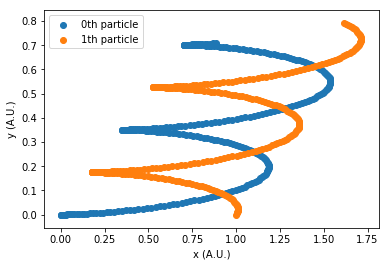

In [33]:
sim.trajectory()

In [34]:
table = setup(0.01, 2)
v = 0.5
table.add_particle(1, [0, 2],  [2, 0])
table.add_particle(1, [-1 * np.sqrt(3), -1], [0, 0])
table.add_particle(1, [np.sqrt(3), -1], [0, 0])
sim = simulator(table)
sim.set_force("-k*x", {"k": 10})
sim.exec(100)

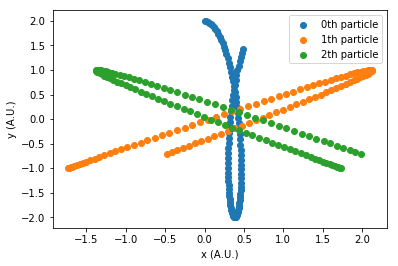

In [35]:
sim.trajectory()

## 8. explosion of charged dense gas

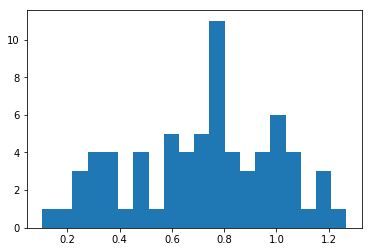

In [112]:
from random import random
table = setup(0.01, 2)
N = 70
m = 1
for i in range(N):
    table.add_particle(m, [random()*10, random()*10],  [random(), random()])
sim = simulator(table)
sim.set_force("1/(x**2)", {"k": 10})

v = []
for i in range(N):
    v.append(sim.setup.particles[i].velocity)
dat = [np.sqrt((np.array(vv)**2).sum()) for vv in v]
plt.hist(dat, 20)

sim.exec(1000)

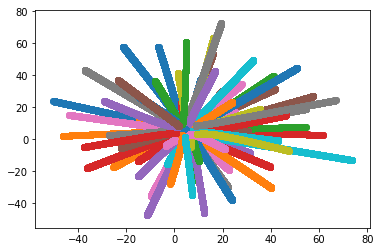

In [113]:
sim.trajectory()

(array([1., 1., 3., 2., 2., 4., 2., 3., 7., 6., 6., 3., 5., 4., 6., 5., 7.,
        0., 0., 3.]),
 array([0.1854874 , 0.54309171, 0.90069602, 1.25830033, 1.61590464,
        1.97350896, 2.33111327, 2.68871758, 3.04632189, 3.4039262 ,
        3.76153051, 4.11913483, 4.47673914, 4.83434345, 5.19194776,
        5.54955207, 5.90715639, 6.2647607 , 6.62236501, 6.97996932,
        7.33757363]),
 <a list of 20 Patch objects>)

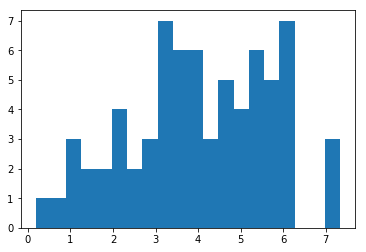

In [114]:
v = []
for i in range(N):
    v.append(sim.setup.particles[i].velocity)
dat = [np.sqrt((vv**2).sum()) for vv in v]
plt.hist(dat, 20)